In [1]:
!pip3 install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 35.2 MB/s 
     |████████████████████████████████| 135 kB 66.6 MB/s 
     |████████████████████████████████| 1.6 MB 56.1 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import autokeras as ak

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

labels = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

4431872/4422102 [==============================] - 0s 0us/step


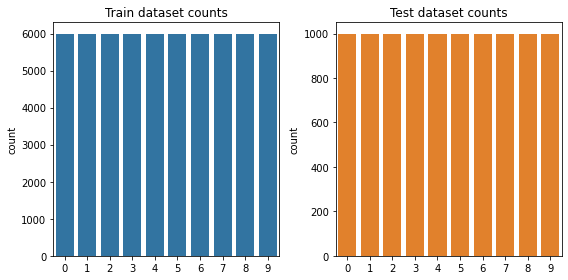

In [4]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
sns.countplot(x=pd.Series(y_train), color='tab:blue')
ax.set_title('Train dataset counts')

ax = fig.add_subplot(1, 2, 2)
sns.countplot(x=pd.Series(y_test), color='tab:orange')
ax.set_title('Test dataset counts')

plt.tight_layout()
plt.show()

In [5]:
cbs = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/', histogram_freq=1)
]

clf = ak.ImageClassifier(max_trials=1, overwrite=True)
history = clf.fit(x_train, y_train, callbacks=cbs)

Trial 1 Complete [00h 03m 02s]
val_loss: 0.21643933653831482

Best val_loss So Far: 0.21643933653831482
Total elapsed time: 00h 03m 02s
Epoch 1/13
1868/1875 [============================>.] - ETA: 0s - loss: 0.4336 - accuracy: 0.8446

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4329 - accuracy: 0.8448
Epoch 2/13
1871/1875 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8884

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112 - accuracy: 0.8884
Epoch 3/13
1865/1875 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.9016

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2754 - accuracy: 0.9017
Epoch 4/13
1874/1875 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.9090

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2558 - accuracy: 0.9089
Epoch 5/13
1875/1875 [==============================] - ETA: 0s - loss: 0.2391 - accuracy: 0.9128

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2391 - accuracy: 0.9128
Epoch 6/13
1872/1875 [============================>.] - ETA: 0s - loss: 0.2261 - accuracy: 0.9190

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2260 - accuracy: 0.9190
Epoch 7/13
1874/1875 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9197

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2188 - accuracy: 0.9197
Epoch 8/13
1869/1875 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9218

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2119 - accuracy: 0.9219
Epoch 9/13
1867/1875 [============================>.] - ETA: 0s - loss: 0.2051 - accuracy: 0.9245

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2049 - accuracy: 0.9245
Epoch 10/13
1873/1875 [============================>.] - ETA: 0s - loss: 0.1999 - accuracy: 0.9254

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1999 - accuracy: 0.9255
Epoch 11/13
1862/1875 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9291

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1912 - accuracy: 0.9291
Epoch 12/13
1871/1875 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9285

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1942 - accuracy: 0.9285
Epoch 13/13
1870/1875 [============================>.] - ETA: 0s - loss: 0.1894 - accuracy: 0.9305

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1892 - accuracy: 0.9306


In [6]:
epochs = np.array(history.epoch) + 1
loss = history.history['loss']
accuracy = history.history['accuracy']

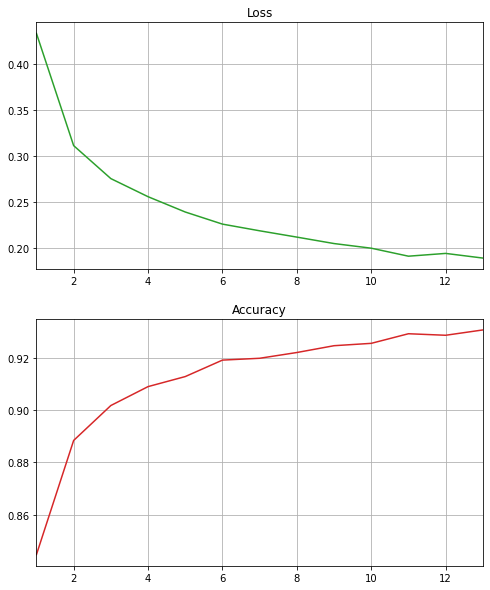

In [7]:
fig = plt.figure(figsize=(8, 10))

ax = fig.add_subplot(2, 1, 1)
ax.set_title('Loss')
sns.lineplot(x=epochs, y=loss, color='tab:green')
plt.xlim([1, epochs[-1]])
plt.grid()

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Accuracy')
sns.lineplot(x=epochs, y=accuracy, color='tab:red')
plt.xlim([1, epochs[-1]])
plt.grid()

plt.show()

In [8]:
clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2279 - accuracy: 0.9218


[0.22792941331863403, 0.9218000173568726]

In [9]:
predicted = clf.predict(x_test).flatten().astype('uint8')

313/313 [==============================] - 1s 2ms/step


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.91      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.90      0.87      0.88      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.83      0.93      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.83      0.70      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [11]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

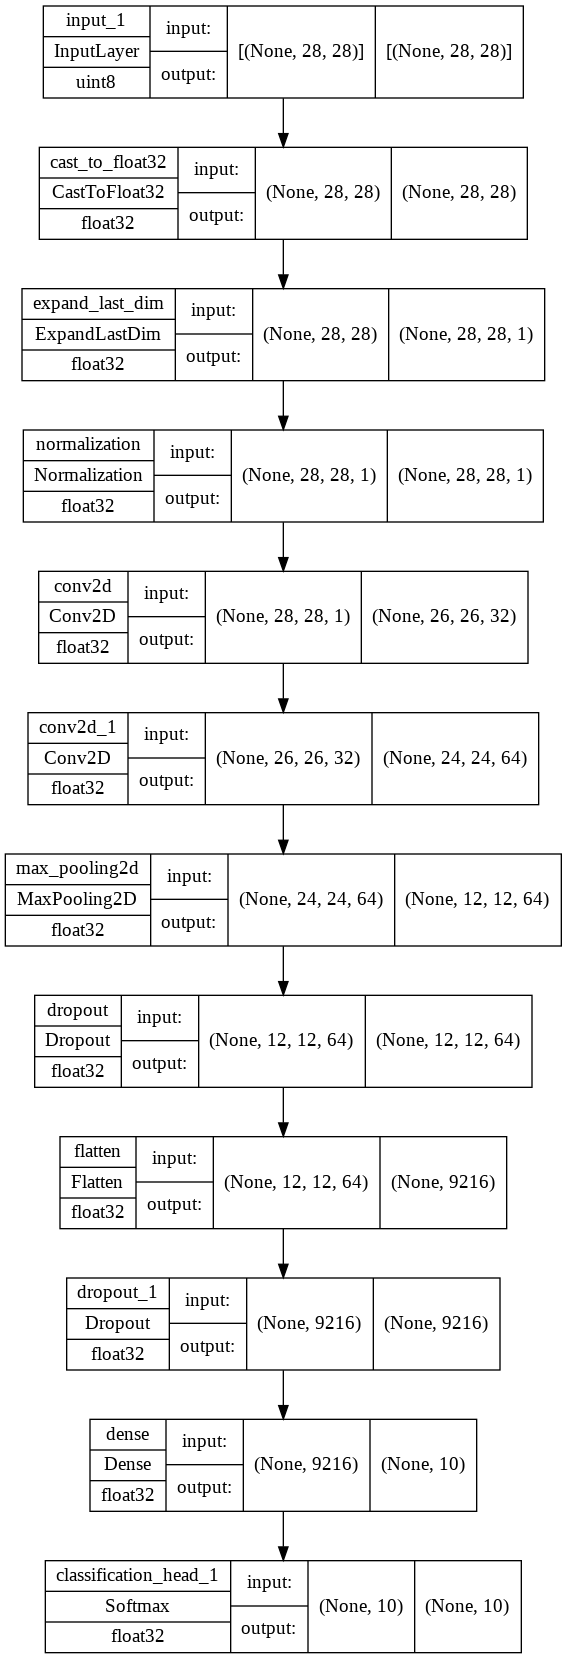

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [13]:
model.save('./fashion_mnist_best_model')

In [14]:
from tensorflow.keras.models import load_model
loaded_model = load_model('./fashion_mnist_best_model', custom_objects=ak.CUSTOM_OBJECTS)

In [15]:
predicted_classes = loaded_model.predict(x_test).argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score, mean_absolute_error

print('Prediction accuracy:', accuracy_score(y_test, predicted_classes).round(3))
print('Prediction MAE:', mean_absolute_error(y_test, predicted_classes).round(3))

Prediction accuracy: 0.922
Prediction MAE: 0.262


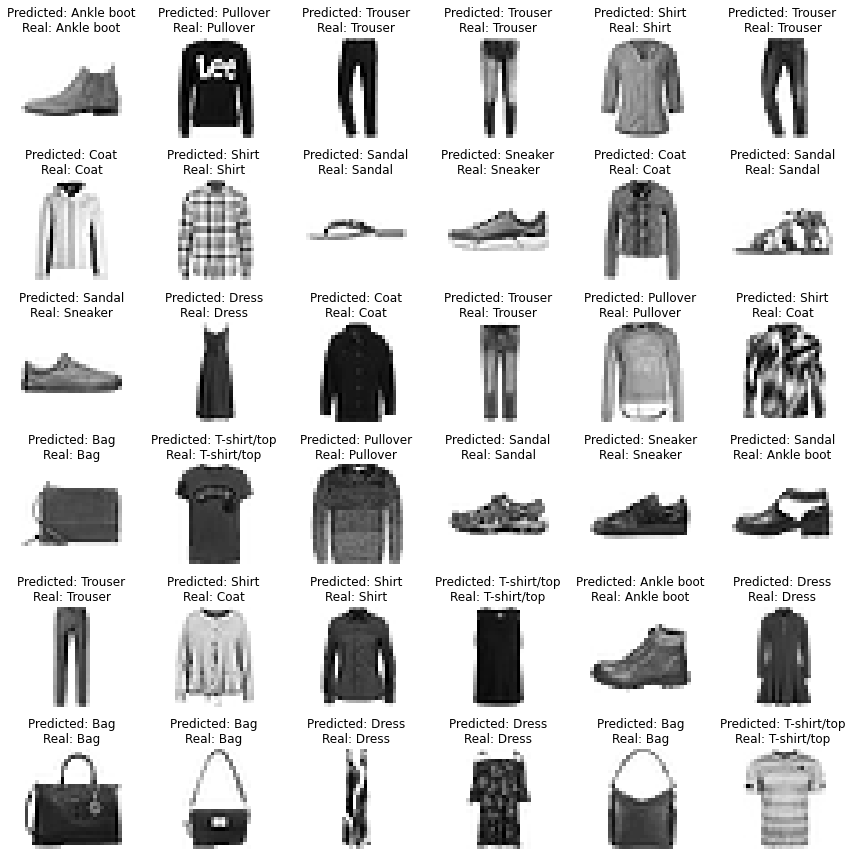

In [17]:
fig = plt.figure(figsize=(12, 12))

for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'Predicted: {labels[predicted_classes[i]]}\nReal: {labels[y_test[i]]}')

plt.tight_layout()
plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs --host localhost